# Lab | Making predictions with logistic regression


In [16]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
password=getpass.getpass()


········


## Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features.
 ## Read the data into a Pandas dataframe.

In [17]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [18]:
df = pd.read_sql_query('select * from historical_film_data', engine )

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      16044 non-null  object 
 1   Avg of Actual Days Rented  15861 non-null  float64
 2   Date of Rental             16044 non-null  object 
 3   rental_duration            16044 non-null  int64  
 4   AVG Rental Rate            16044 non-null  float64
 5   Rent Frequency             16044 non-null  int64  
 6   inventory_id               16044 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 877.5+ KB


## Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.

In [24]:
df=df[df['Avg of Actual Days Rented'].isna()== False]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15861 entries, 0 to 16043
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      15861 non-null  object 
 1   Avg of Actual Days Rented  15861 non-null  float64
 2   Date of Rental             15861 non-null  object 
 3   rental_duration            15861 non-null  int64  
 4   AVG Rental Rate            15861 non-null  float64
 5   Rent Frequency             15861 non-null  int64  
 6   inventory_id               15861 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 991.3+ KB


In [35]:
corr_matrix = df.corr()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df.drop(['Rent Frequency'], axis = 1, inplace = True)

<AxesSubplot:>

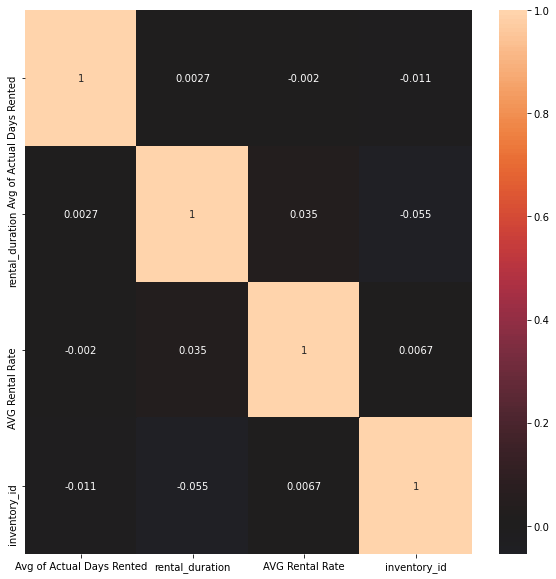

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,center=0,annot=True)

In [37]:
import numpy as np 
from sklearn.preprocessing import Normalizer

X= df.select_dtypes(include = np.number)



In [38]:
transformer = Normalizer ()
transformer.fit(X)
x_normalized = transformer.transform(X)

In [39]:
x = pd.DataFrame(x_normalized, columns = X.columns)

In [41]:
cat = df.select_dtypes(include=np.object)

<ipython-input-41-54c943bf1bcd>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = df.select_dtypes(include=np.object)


In [42]:
cat

,title,Date of Rental
0,WARDROBE PHANTOM,August-2005
1,WARDROBE PHANTOM,August-2005
2,WARLOCK WEREWOLF,July-2005
3,WARLOCK WEREWOLF,July-2005
4,WARLOCK WEREWOLF,August-2005
...,...,...
16039,ORIENT CLOSER,August-2005
16040,ORIENT CLOSER,August-2005
16041,ORIENT CLOSER,June-2005
16042,ORIENT CLOSER,July-2005


In [43]:
x.head()

,Avg of Actual Days Rented,rental_duration,AVG Rental Rate,inventory_id
0,0.001595,0.001367,0.000681,0.999998
1,0.001595,0.001367,0.000681,0.999998
2,0.000911,0.001367,0.000681,0.999998
3,0.001595,0.001367,0.000681,0.999998
4,0.002050,0.001367,0.000681,0.999997
